# Project: Wrangle and Analyze Data

# Gather

In this next cell I am reading the 'twitter-archive-enhanced.csv into a pandas DataFrame.

In [86]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

In [87]:
df_original = pd.read_csv('twitter-archive-enhanced.csv')

Next, I am getting the image-predictions.tsv file from the provided url using the requests library.

In [88]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
open('image-predictions.tsv', 'wb').write(r.content)
df_images_original = pd.read_csv('image-predictions.tsv', sep='\t')

Here, I am using the twitter API to write the json object for each tweet to a txt file to use later. I have commented it out to avoid running it again as it prints many lines and takes a long time.

In [89]:
#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
#with open('tweet_json.txt', 'w') as outfile:  
 #   for i in ids_df.tweet_id:
  #      try:
   #         print(i)
    #        tweet = api.get_status(i, tweet_mode='extended')
     #       json.dump(tweet._json, outfile)
      #      outfile.write('\n')
       # except:
        #    print('whoops')
        


Next, I am reading from the txt file and using the stored json data to make a pandas dataframe with the retweet count and favorite count for each tweet.

In [90]:
import json
import re
import pandas as pd

df_tweets_original = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'like_count'])
errors = 0
clean = 0
with open('tweet_json.txt', 'r') as file:
    for line in file:
        try:
            json_tweet = json.loads(line)
            t_id = json_tweet['id']
            retweets = json_tweet['retweet_count']
            likes = json_tweet['favorite_count']
            df_tweets_original = df_tweets_original.append({'tweet_id':t_id, 'retweet_count':retweets, 'like_count':likes}, sort=False, ignore_index=True)
            clean += 1
        except Exception as e:
            errors +=1
print('clean: ' + str(clean))
print('errors: ' + str(errors))

clean: 2339
errors: 0


# Assess

In [91]:
#Assessing the given data
df_original

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [92]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [93]:
#Assessing the gathered data from the APi
df_tweets_original

,tweet_id,retweet_count,like_count
0,892420643555336193,8237,37791
1,892177421306343426,6087,32469
2,891815181378084864,4028,24441
3,891689557279858688,8392,41120
4,891327558926688256,9090,39336
5,891087950875897856,3016,19768
6,890971913173991426,1993,11559
7,890729181411237888,18309,63745
8,890609185150312448,4142,27169
9,890240255349198849,7156,31148


In [94]:
df_tweets_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id         2339 non-null object
retweet_count    2339 non-null object
like_count       2339 non-null object
dtypes: object(3)
memory usage: 54.9+ KB


In [95]:
#Assessing the image predition data frame
df_images_original

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [96]:
df_images_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [97]:
df_images_original.query('p1_dog == False and p2_dog == False and p3_dog == False').count()[0]

324

# Define

### Assessment Notes:
#### Quality Issues:
>1. retweet_count should be an integer
>
>2. like_count should be an integer
>
>3. timestamp should be a datetime object
>
>4. retweeted tweets included in the data
>
>5. in-reply tweets included in the data
>
>6. not all image predictions are dogs
>
>7. NaN values in the expanded url column
>
>8. missing tweets not included in some of the data sources and included in others

#### Tidiness Issues:
>1. data is spread out among 3 different sources and should be joined on tweet_id
>
>2. doggo, floofer, pupper, and puppo columns in the given data should be combined into one variable.


# Clean

Below I will use code to clean the issues mentioned above. Then I will use pandas functions to test for my changes.

## Code

In [98]:
df_tweets = df_tweets_original.copy()
df = df_original.copy()
df_images = df_images_original.copy()

Quality Issue # 1. retweet_count should be an integer. Changing the datatype to integer.

In [99]:
df_tweets.retweet_count = df_tweets.retweet_count.astype(int)

Quality Issue # 2. like_count should be an integer. Changing the datatype to integer.

In [100]:
df_tweets.like_count = df_tweets.like_count.astype(int)

Quality Issue # 3. timestamp should be a datetime object. Changing the datatype to datetime.

In [101]:
df.timestamp = pd.to_datetime(df.timestamp)

Quality Issue # 4. retweeted tweets included in the data. dropping those columns.

In [102]:
df = df[np.isnan(df['retweeted_status_id'])]
df = df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

Quality Issue # 5. in-reply tweets included in the data. dropping those columns

In [103]:
df = df[np.isnan(df['in_reply_to_status_id'])]
df = df.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'])

Quality Issue # 6. not all image predictions are dogs. I am making a dataframe with the best prediction provided by the data.

In [104]:
df_dog_guess = pd.DataFrame(columns=['tweet_id', 'best_guess'])
for index, row in df_images.query('p1_dog == True or p2_dog == True or p3_dog == True').iterrows():
    if(row.p1_dog):
        df_dog_guess = df_dog_guess.append({'tweet_id' : row.tweet_id, 'best_guess' : row.p1}, ignore_index=True)
    elif(row.p2_dog):
        df_dog_guess = df_dog_guess.append({'tweet_id' : row.tweet_id, 'best_guess' : row.p2}, ignore_index=True)
    else:
        df_dog_guess = df_dog_guess.append({'tweet_id' : row.tweet_id, 'best_guess' : row.p3}, ignore_index=True)

Quality Issue # 7. NaN values in the expanded url column

In [105]:
df = df.dropna()

Tidiness Issue # 1. Data is spread out among 3 different sources. I am going to join the sources.

In [106]:
df_tweets.tweet_id = df_tweets.tweet_id.astype(int)
df = df_tweets.join(df.set_index('tweet_id'), on='tweet_id')

In [107]:
df_dog_guess.tweet_id = df_dog_guess.tweet_id.astype(int)
df = df_dog_guess.join(df.set_index('tweet_id'), on='tweet_id')

Quality Issue # 8. missing tweets not included in some of the data sources and included in others

In [108]:
df = df.dropna()

Tidiness Issue # 2. doggo, floofer, pupper, and puppo columns in the given data should be combined into one variable.

In [109]:
df_doggo = pd.melt(df, id_vars = ['tweet_id'], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], value_name='word')
df_doggo = df_doggo.mask(df_doggo.eq('None')).dropna()
df_doggo = df_doggo.drop(columns= ['variable'])

Thanks to the reviewer that pointed out that some of these tweets use more than one of these internet words. I will handle this case bu marking those tweets with the value 'multiple'.

In [110]:
multiple_words = df_doggo[df_doggo.duplicated(subset='tweet_id')]

In [111]:
for index, row in multiple_words.iterrows():
    df_doggo = df_doggo.query('tweet_id != {0}'.format(row.tweet_id));
    df_doggo = df_doggo.append({'tweet_id':row.tweet_id, 'word': 'multiple'}, ignore_index=True)

In [112]:
df = df.join(df_doggo.set_index('tweet_id'), on='tweet_id')

## Test
Here I will test for the changes I just made.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1750
Data columns (total 16 columns):
tweet_id              1663 non-null int64
best_guess            1663 non-null object
retweet_count         1663 non-null float64
like_count            1663 non-null float64
timestamp             1663 non-null datetime64[ns]
source                1663 non-null object
text                  1663 non-null object
expanded_urls         1663 non-null object
rating_numerator      1663 non-null float64
rating_denominator    1663 non-null float64
name                  1663 non-null object
doggo                 1663 non-null object
floofer               1663 non-null object
pupper                1663 non-null object
puppo                 1663 non-null object
word                  257 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(10)
memory usage: 220.9+ KB


In [124]:
df.word.unique()

array([nan, 'pupper', 'floofer', 'doggo', 'multiple', 'puppo'], dtype=object)

In [114]:
df.head()

,tweet_id,best_guess,retweet_count,like_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,word
0,666020888022790149,Welsh_springer_spaniel,498.0,2526.0,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,None,None,None,None,None,NaN
1,666029285002620928,redbone,46.0,125.0,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,None,None,None,None,NaN
2,666033412701032449,German_shepherd,43.0,122.0,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,None,None,None,None,NaN
3,666044226329800704,Rhodesian_ridgeback,136.0,290.0,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,None,None,None,None,NaN
4,666049248165822465,miniature_pinscher,42.0,105.0,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,None,None,None,None,NaN


In [115]:
df_dog_guess.head()

,tweet_id,best_guess
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


## Analysis and Insights

For my first insight, I wanted to see which dog breeds recieved the most retweets on avergae. So I created a dataframe with the predicted breed type and average retweet count to see which ones had the most overall.

In [116]:
#Which dog breed got the most retweets?
#average retweet for dog breed
df_retweets_per_breed = pd.DataFrame(columns=['breed', 'avg_retweet_count'])
for i in df['best_guess'].unique():
    avg_rt = (sum(df.query('best_guess == "{0}"'.format(i)).retweet_count)/df.query('best_guess == "{0}"'.format(i)).count()[0])
    df_retweets_per_breed = df_retweets_per_breed.append({'breed':i, 'avg_retweet_count': avg_rt}, ignore_index=True)
df_retweets_per_breed.describe()
df_retweets_per_breed.query('avg_retweet_count >= 2929.255319').sort_values(by=['avg_retweet_count'], ascending=False)

,breed,avg_retweet_count
93,Bedlington_terrier,7813.666667
110,Afghan_hound,5591.666667
52,standard_poodle,5178.818182
59,French_bulldog,5121.533333
67,English_springer,5079.700000
108,Saluki,4806.250000
73,whippet,4794.727273
65,cocker_spaniel,4626.933333
51,Eskimo_dog,4518.500000
80,Samoyed,4435.146341


My next point of interest was which internet dog word recieved the most retweets? Which word out of "doggo", "floofer", "pupper", and "puppo" was most commonly found in the accounts most popular tweets. I calculated the average for each word and added it to a dataframe.

In [120]:
#Which word got the most retweets?
#average retweet for word
df_retweets_per_word = pd.DataFrame(columns=['word', 'avg_retweet_count'])
for i in ['doggo', 'floofer', 'pupper', 'puppo', 'multiple']:
    avg_rt = (sum(df.query('word == "{0}"'.format(i)).retweet_count)/df.query('word == "{0}"'.format(i)).count()[0])
    df_retweets_per_word = df_retweets_per_word.append({'word':i, 'avg_retweet_count': avg_rt}, ignore_index=True)
df_retweets_per_word.sort_values(by=['avg_retweet_count'], ascending=False)

,word,avg_retweet_count
0,doggo,7004.592593
3,puppo,6146.761905
4,multiple,5910.444444
1,floofer,4645.285714
2,pupper,2304.813253


I was also interested in which dog breeds recieved the highest average ratings by the account. So I made a a dataframe with the average rating value for each breed.

In [121]:
#which dog breeds recieved the highest ratings?
#average rating per breed
df_ratings_per_breed = pd.DataFrame(columns=['breed', 'avg_rating'])
for i in df['best_guess'].unique():
    avg_rating = (sum(df.query('best_guess == "{0}"'.format(i)).rating_numerator/df.query('best_guess == "{0}"'.format(i)).rating_denominator)/df.query('best_guess == "{0}"'.format(i)).count()[0])
    df_ratings_per_breed = df_ratings_per_breed.append({'breed':i, 'avg_rating': avg_rating}, ignore_index=True)
df_ratings_per_breed.describe()
df_ratings_per_breed.query('avg_rating >= 1.125000').sort_values(by=['avg_rating'], ascending=False)

,breed,avg_rating
111,clumber,2.700000
112,Bouvier_des_Flandres,1.300000
46,Pomeranian,1.253659
108,Saluki,1.250000
104,briard,1.233333
101,Tibetan_mastiff,1.225000
106,Border_terrier,1.214286
89,standard_schnauzer,1.200000
109,silky_terrier,1.200000
9,Gordon_setter,1.175000


For my visualization, I wanted to see which of the internet slang words we're used the most by the account. To my surprise it wasn't "doggo", which in my opinion is better for general use, and as we found out earlier gets used the most by the account when writing their tweets.

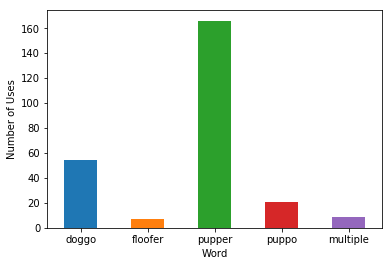

In [122]:
doggo_uses = df.query('word == "doggo"').count()[0]
floofer_uses = df.query('word == "floofer"').count()[0]
pupper_uses = df.query('word == "pupper"').count()[0]
puppo_uses = df.query('word == "puppo"').count()[0]
multiple_uses = df.query('word == "multiple"').count()[0]

df_word_analysis = pd.DataFrame({'word': ['doggo', 'floofer', 'pupper', 'puppo', 'multiple'], 'number_of_uses':[doggo_uses, floofer_uses, pupper_uses, puppo_uses, multiple_uses]})
ax = df_word_analysis.plot.bar(x='word', y='number_of_uses', rot=0, legend=False)
ax.set_ylabel("Number of Uses")
ax.set_xlabel("Word")
ax

In [123]:
df.to_csv('twitter_archive_master.csv');